# Mockup

[Link](https://www.figma.com/file/CEi7r7fd9bamV6zGRWiMV3/IIP-Mockup-Project?node-id=0-1&t=oJjgpgWSo6AACs4A-0)

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

(256, 256, 192)


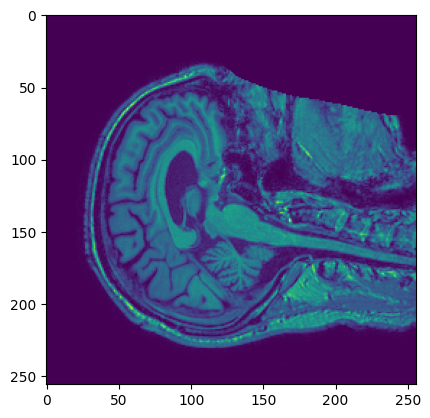

In [2]:
image_data = nib.load('data/T1.nii.gz') #Load the image
image = image_data.get_fdata() #get the image
plt.imshow(image[:,:,100]) #shows the image 3D and Z allows access to cross section on the plane z = 20
print(image.shape)

33.81131410090389


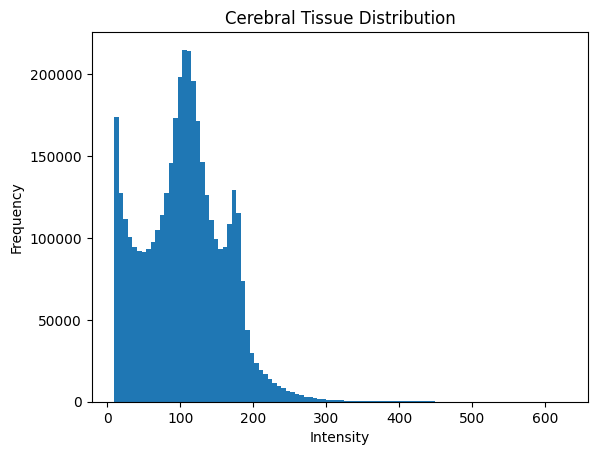

In [6]:
plt.title('Cerebral Tissue Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.hist(image[image > 10].flatten(),100) #Build a histogram with conditions. The first peak usually represent Cerebrospinal liquid. The second peak Gray Matter and finally the thrid peak is White Matter 
print(image.mean())

# Threholding Algorithm (Umbralización)


In [ ]:
tol = 1 #convergence tolerance value
tau = 150 #initial threshold value. Region of interest
while True:
  print(tau)

 #Threshold the image using the current threshold value
  segmentation = image >= tau
  #The voxels >= than threshold value, is assigned 1, otherwise 0.
  #In other words, calculate mean values for foreground and background regions
  mBG = image[np.multiply(image > 10, segmentation == 0)].mean()
  mFG = image[np.multiply(image > 10, segmentation == 1)].mean()

  #Calculate the new threshold value
  tau_post = 0.5 * (mBG + mFG)

  #When convergence is reached, break the loop
  if np.abs(tau - tau_post) < tol:
    break;
  else:
    tau = tau_post

    

150
134.22228198012655
126.04138170935408
121.01133213034501
117.55104607745828
115.02348180415736
113.11155589235963
111.62928548249559
110.47181185245388


192


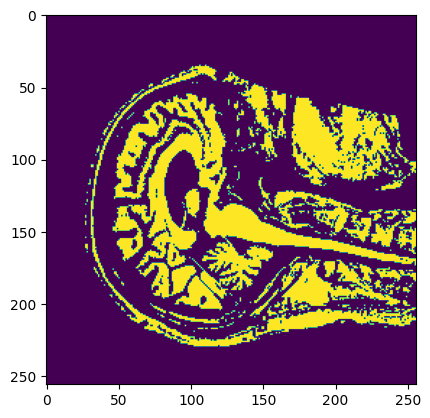

In [ ]:
total_coronal_planes = segmentation.shape[2]
print(total_coronal_planes)
plt.imshow(segmentation[:,:,100]) # Display the segmented image in a coronal slice

(array([9.58700e+04, 7.78410e+04, 6.72610e+04, 6.03830e+04, 5.73150e+04,
        5.43600e+04, 5.16070e+04, 4.93050e+04, 4.76160e+04, 4.66570e+04,
        4.60560e+04, 4.59010e+04, 4.59280e+04, 4.57710e+04, 4.62590e+04,
        4.73470e+04, 4.79150e+04, 4.97150e+04, 5.12750e+04, 5.33750e+04,
        5.56360e+04, 5.86620e+04, 6.17350e+04, 6.60070e+04, 7.02140e+04,
        7.55240e+04, 8.31850e+04, 8.99630e+04, 9.61970e+04, 1.02454e+05,
        1.06305e+05, 1.08743e+05, 1.08674e+05, 1.05604e+05, 1.00765e+05,
        9.52320e+04, 8.92900e+04, 8.22170e+04, 7.59090e+04, 7.04330e+04,
        6.51960e+04, 6.13290e+04, 5.68850e+04, 5.38620e+04, 5.06800e+04,
        4.89820e+04, 4.71150e+04, 4.62700e+04, 4.62970e+04, 4.81010e+04,
        5.16420e+04, 5.71730e+04, 6.32970e+04, 6.61300e+04, 6.26120e+04,
        5.28220e+04, 4.17550e+04, 3.17400e+04, 2.45290e+04, 1.95090e+04,
        1.61410e+04, 1.37330e+04, 1.24140e+04, 1.11020e+04, 1.01500e+04,
        9.41300e+03, 8.76500e+03, 8.15400e+03, 7.31

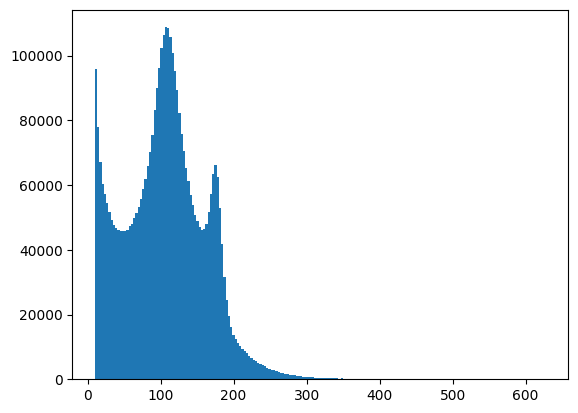

In [ ]:
#The second argument represents the total bins that will use in the histogram
plt.hist(image[image > 10].flatten(),200) #Display a histogram of the image pixel values

# Region  Growing


In [ ]:
#tolerance value
tol = 30
segmentation = np.zeros_like(image)

#Seed value
mean_value_cluster = image[0,0,0]

# Define the maximum offset in each direction
print(image.shape)
x_offsets = np.arange(-image.shape[0], image.shape[0])
y_offsets = np.arange(-image.shape[1], image.shape[1])
#just for the one cross section because for all Z planes it's too slow
z_offsets = np.arange(99, 100)
#for the all Z planes uncomment the next lines and comment previous line
#z_offsets = np.arange(-image.shape[2]+1, image.shape[2]-1)

# Loop over the neighboring pixels in the x, y, and z directions
for dz in z_offsets:
  for dy in y_offsets:
    for dx in x_offsets:
      # Check if the absolute difference between the current pixel and mean_value_cluster is less than the tolerance
      if np.abs(mean_value_cluster - image[dx, dy, dz]) < tol: 
        segmentation[dx, dy, dz] = 1
      else: 
        segmentation[dx, dy, dz] = 0
# Calculate the mean value of the pixels in the cluster and set it as the new mean_value_cluster
mean_value_cluster = image[segmentation == 1].mean()

(256, 256, 192)


In [59]:
print(segmentation[0:3,0:3,0:3])
print(mean_value_cluster)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
35.61497448630071


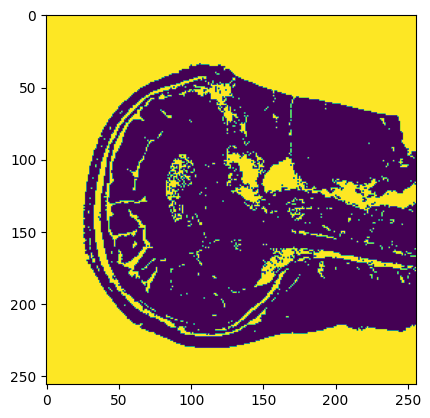

In [68]:
plt.imshow(segmentation[:,:,99])

# K-Means

In [ ]:
tol = 1
tau = 150

# Calculate the minimum, mean, and maximum values of the image
k1 = np.amin(image)
k2 = np.mean(image)
k3 = np.amax(image)
print(k1,k2,k3)
# Loop n times to perform k-means segmentation
n = 50
for i in range(0,n):

  #Calculate the distances from each pixel to the three values
  distance_1 = np.abs(k1 - image)
  distance_2 = np.abs(k2 - image)
  distance_3 = np.abs(k3 - image)

  # Create a segmentation matrix with values 0, 1, and 2 based on which value each pixel is closest to
  segmentation = np.zeros_like(image)
  #group 1
  segmentation[np.multiply(distance_1 < distance_2, distance_1 < distance_3)] = 0
  #group 2
  segmentation[np.multiply(distance_2 < distance_1, distance_2 < distance_3)] = 1
  #group 3
  segmentation[np.multiply(distance_3 < distance_1, distance_3 < distance_2)] = 2

  # Calculate the mean of each group
  k1 = image[segmentation == 0].mean()
  k2 = image[segmentation == 1].mean()
  k3 = image[segmentation == 2].mean() 


0.0 33.81131410090389 627.563720703125


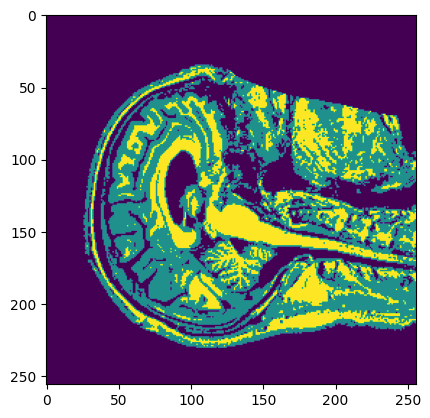

In [ ]:
plt.imshow(segmentation[:,:,100])